In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv('C:/Gene Data/data.csv', index_col=[0])
labels = pd.read_csv('C:/Gene Data/labels.csv', index_col=[0])


In [10]:
data.shape

(801, 20531)

In [12]:
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [13]:
labels.head()

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA


The Class depicts the type of tumor out of the five types

In [14]:
frames = [labels, data]
df = pd.concat(frames, axis=1)
df.reset_index(drop=True, inplace=True)

# checking the shape of the combined dataframe
df.shape

(801, 20532)

In [15]:
df.head()

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


# Data Processing 

In [16]:
X = df.iloc[:, 1:].values

# normalizing the features
X = StandardScaler().fit_transform(X)

In [17]:
X.shape

(801, 20531)

In [18]:
# checking the mean and standard deviation
np.mean(X), np.std(X)

(1.4603746478980196e-18, 0.9934763587711302)

The mean is nearly equal to zero and the variance is nearly 1 as we normalized the data. 

# Applying Principal Component Analysis (PCA)

**I will project the 20531-dimensional Cancer RNA-seq data to two-dimensions using PCA.**

- Original dimensions = 20531
- Dimensions after applying PCA = 2

In [20]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

**Converting the above result into a dataframe.**

In [21]:
pca_df = pd.DataFrame(
    data=pca_data, columns=["Principal Component 1", "Principal Component 2"]
)
pca_df.tail()

,Principal Component 1,Principal Component 2
796,-12.417385,-42.321573
797,-29.415554,28.526283
798,-4.133090,15.690013
799,-30.814757,33.526422
800,-22.344557,4.052356


In [22]:
print(
    "Explained variance per principal component: {}".format(
        pca.explained_variance_ratio_
    )
)

Explained variance per principal component: [0.10539781 0.08754232]




**Observations:**

- The results above display the explained variance for the principal components.
  
    - The first principal component accounts for 10.54% of the total variance in the dataset.
    - The second principal component accounts for 8.75% of the total variance.

- There is a significant dimensionality reduction, from 20,531 features down to just 2, with these two components explaining nearly 20% of the total variance.

- In comparison, for some other datasets, PCA often captures a significantly higher proportion of variance.
  
    - For instance, in certain datasets, two principal components can explain over 90% of the tourther refinements!

In [23]:
# defining the targets
targets = list(df.Class.unique())
targets

['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']

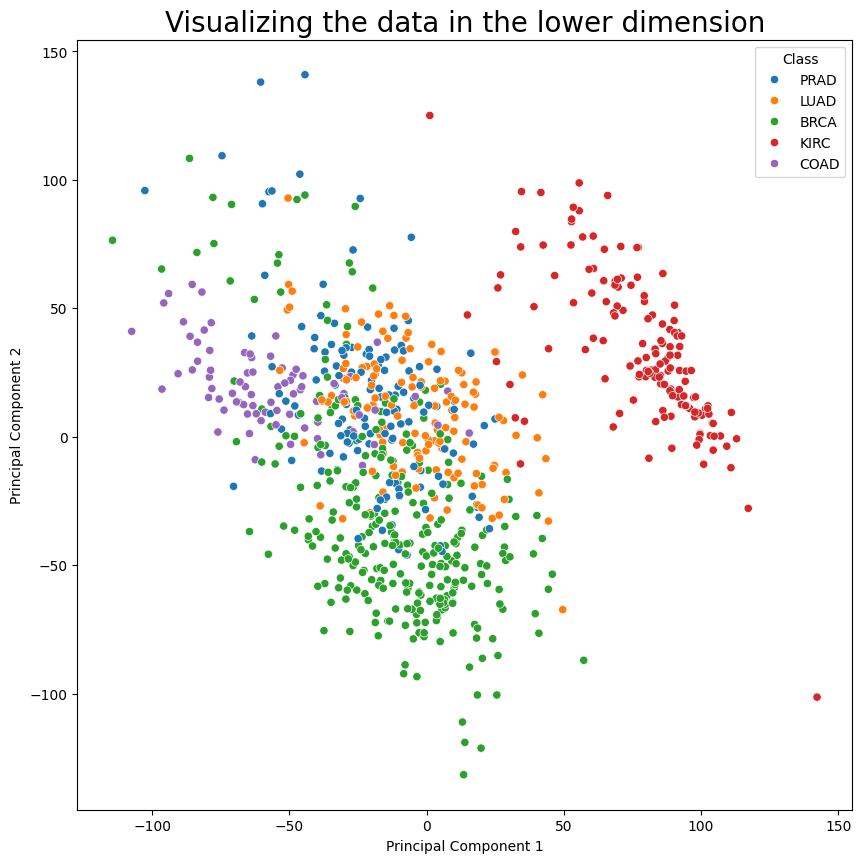

In [24]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    data=pca_df, x="Principal Component 1", y="Principal Component 2", hue=df.Class
)
plt.title("Visualizing the data in the lower dimension", fontsize=20)
plt.show()

**Insight**
- From the above plot, we can observe that the five classes (**PRAD**, **LUAD**, **BRCA**, **KIRC**, **COAD**), when projected to a two-dimensional space, can be linearly separable up to some extent.
- Other observations can be that the **KIRC** class is clearly separated out as compared to the other class.

**Applying t-distribution Stochastic Neighbor Embedding (t-SNE)**

In [25]:
# to perform t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=1)
tsne_data = tsne.fit_transform(X)

In [26]:
tsne_df = pd.DataFrame(data=tsne_data, columns=["Component 1", "Component 2"])
tsne_df.tail()

,Component 1,Component 2
796,9.758751,-7.662987
797,-21.811710,-0.786317
798,-26.779221,-14.442762
799,-6.353409,22.360229
800,-10.251727,22.070950


**Lower Dimension**


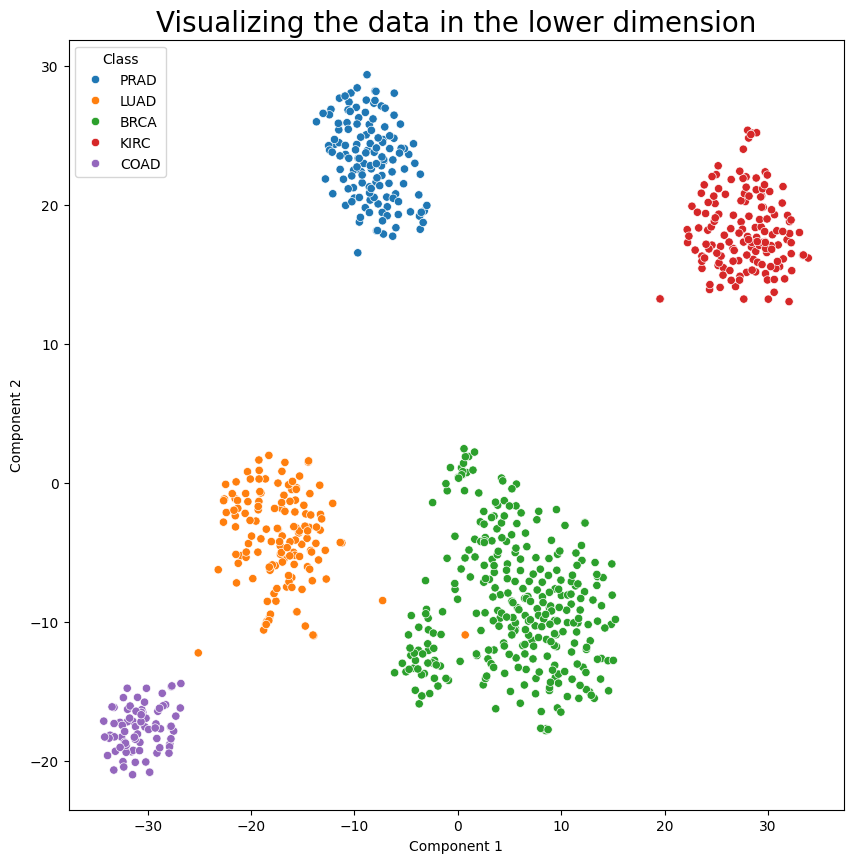

In [27]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=tsne_df, x="Component 1", y="Component 2", hue=df.Class)
plt.title("Visualizing the data in the lower dimension", fontsize=20)
plt.show()

**Insight**
- From the above plot, I observed the five classes (**PRAD**, **LUAD**, **BRCA**, **KIRC**, **COAD**), when projected to a two-dimensional space, are linearly separable to a large extent.
- A few points from the **LUAD** class are far away from the rest and closer to the **KIRK** class.

# Changing Perplexity

Running the t-SNE with differnt values of perplexity

Visualizing the lower dimensional representation of data for different values of perplexity


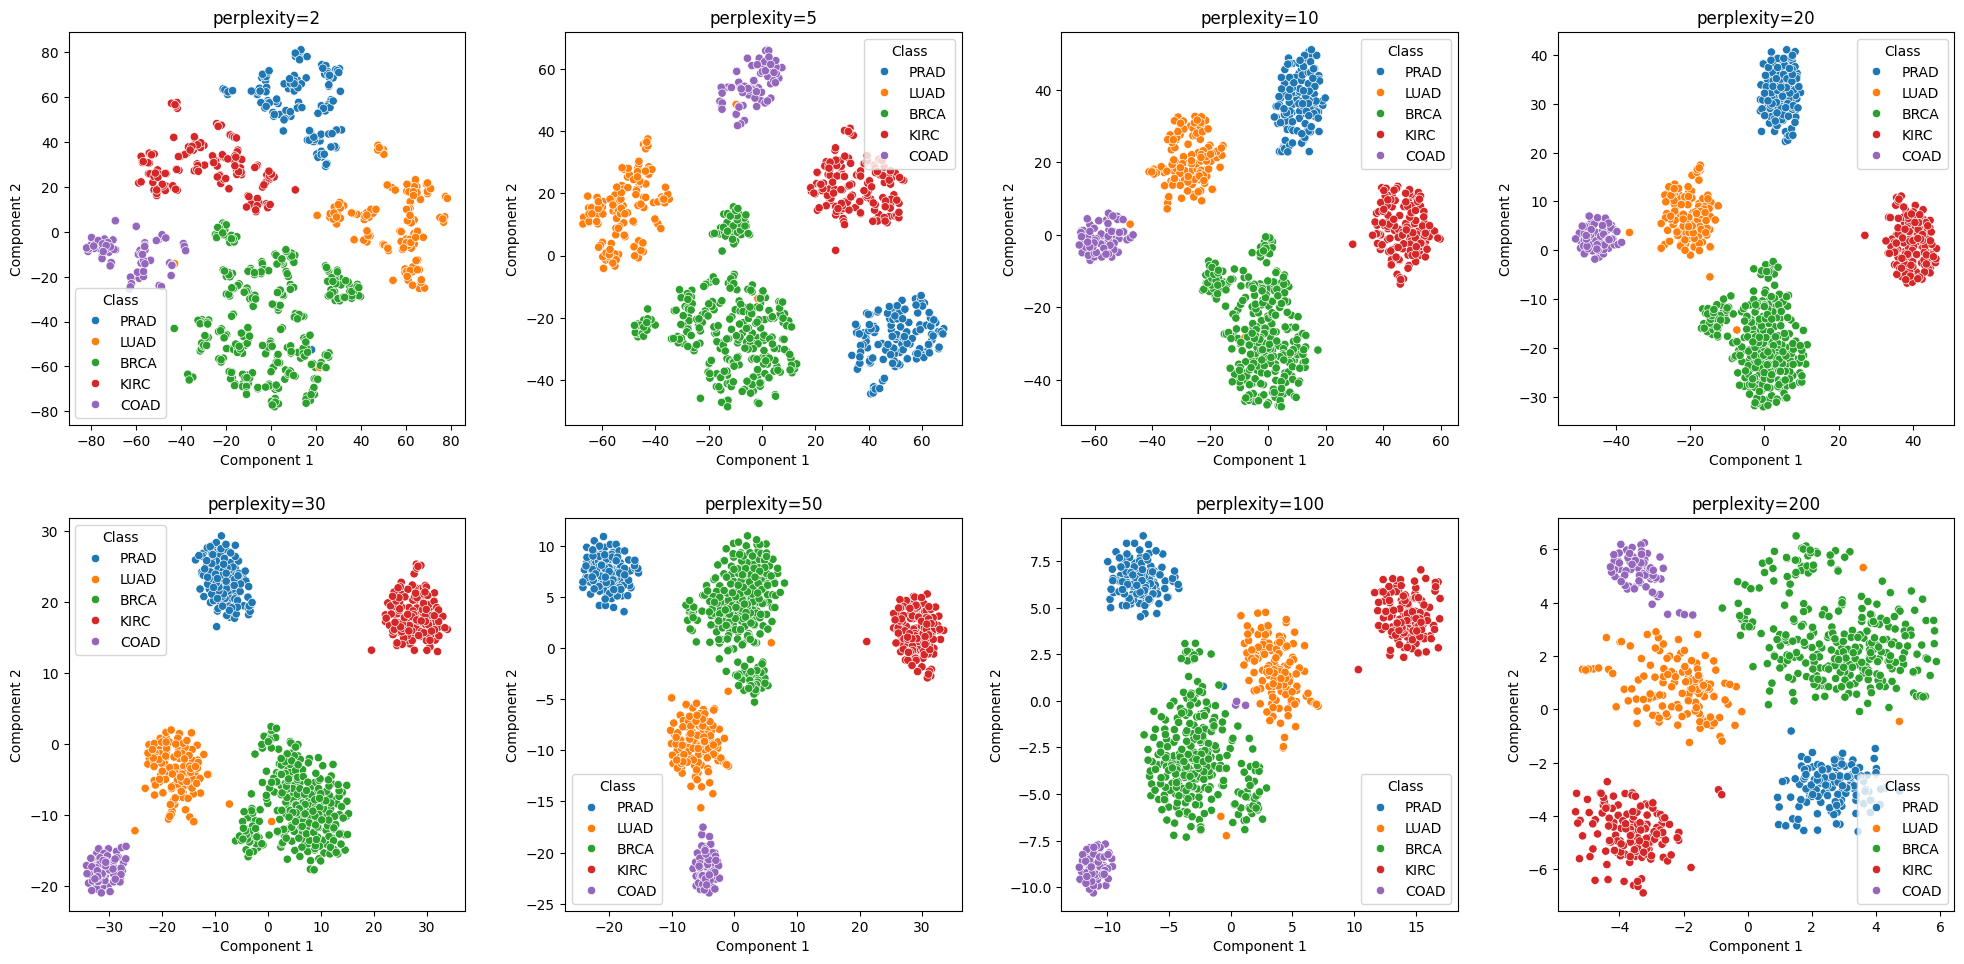

In [28]:
perplexity = [2, 5, 10, 20, 30, 50, 100, 200]

plt.figure(figsize=(20, 10))
print(
    "Visualizing the lower dimensional representation of data for different values of perplexity"
)

for i in range(len(perplexity)):
    tsne = TSNE(n_components=2, perplexity=perplexity[i], n_jobs=-2, random_state=1)
    # n_jobs specifies the number of parallel jobs to run
    # -2 means using all processors except one
    X_red = tsne.fit_transform(X)

    red_data_df = pd.DataFrame(data=X_red, columns=["Component 1", "Component 2"])

    plt.subplot(2, int(len(perplexity) / 2), i + 1)

    plt.title("perplexity=" + str(perplexity[i]))
    sns.scatterplot(data=red_data_df, x="Component 1", y="Component 2", hue=df.Class),
    plt.tight_layout(pad=2)

**Observations**:

* With low perplexity value (2), data points are more scattered.
* With perplexity values ranging from 5 to 50, three distinct groups are clearly visible.
* With very high value of perplexity (100 and 200), the groups are still separable but slightly more spread out.



**Conclusion:**

The gene expression data underwent significant dimensionality reduction using Principal Component Analysis (PCA), where the first two principal components were found to explain a combined total of approximately 20% of the variance in the dataset. This indicates that although the dataset was reduced from 20,531 dimensions to just 2, a considerable amount of information is retained in these components.

However, compared to other datasets where PCA may explain over 90% of the variance with just two components, this lower explained variance suggests that the gene expression data is more complex and spread out across many dimensions. As a result, more components would likely be needed to capture a higher percentage of the dataset's variance.

Overall, while PCA achieved a substantial reduction in dimensionality, it also highlights the need for further investigation into the contributions of additional components to capture more variance or to explore other techniques for dimensionality reduction or feature smodifications!